# Описание датасета

**Предметная область**: Прогнозирование возникновения диабета на основе диагностических мер

**Источник данных**: [Kaggle: USA Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

**Характер данных**: Реальные 

**Атрибуты**:

`Pregnancies (Беременность)` - Количество беременностей

`Glucose (Уровень глюкозы)` - Концентрация глюкозы в плазме крови в течение 2 часов при пероральном тесте на толерантность к глюкозе

`BloodPressure (Артериальное давление)` - Диастолическое артериальное давление (мм рт. ст.)

`SkinThickness (Толщина кожи)` - Толщина кожной складки на трицепсе (мм)

`Insulin (Инсулин)` - 2-часовой прием сывороточного инсулина (mu U/ml) 

`BMI (Индекс массы тела)` - Индекс массы тела (Рассчитывается: вес (в кг.) / (рост в м.)^2)

`Age (Возраст)` - Возраст пациентки

`Outcome` - Исход. Возникнет ли у пациентки диабет.


**Задача анализа**:
Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных.

`1.` В качестве целевого класса выберем `Outcome` (результат - возникнет ли диабет или нет)

`2.` Импортируем необходимые библиотеки:
- `Pandas` - библиотека для анализа и манипуляции данными.
- `sklearn.tree` - используем алгоритм классификации - дерево решений
- `sklearn.tree` - используем алгоритм классификации - ближайшие соседи

In [49]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

`3.` Загрузим рассматриваемый датасет:

In [50]:
df = pd.read_csv('diabetes.csv')

In [51]:
# Удаление дубликатов
df = df.dropna()

# Выборка числовых столбцов
number_cols = df.select_dtypes(include='number')

`3.1.` Функция поиска выбросов:

In [52]:
def finding_outliers(df, col):
    q1 = df[col].quantile(0.25)                     # Значение, ниже которого находится 25% данных
    q3 = df[col].quantile(0.75)                     # Значение, ниже которого находится 75% данных
    iqr = q3 - q1                                   # Показатель того, насколько широко распределены средние 50% данных

    lower_bound = q1 - 1.5 * iqr                    # Нижняя граница
    upper_bound = q3 + 1.5 * iqr                    # Верхняя граница

    # Таким образом, значения ниже нижней границы или выше верхней границы считаются выбросами
    # Строки с такими значениями (выбросами) заносим в новый dataframe
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Количество выбросов до удаления: {outliers.shape[0]}')

    # Выбираем все строки, где значение в столбце не является выбросом
    df_cleaned = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f'Количество выбросов после удаления: {outliers.shape[0]}')
    
    return df_cleaned


`3.2.` Выведем основную информацию о числовых и строковых атрибутах

In [53]:
print('Обработка числовых значений:')
for col in number_cols:
    print(f'\n\nАтрибут: {col}')
    print(f'Среднее значение: {df[col].mean()}')
    print(f'Средневадратическое отклонение: {df[col].std()}')
    
    # Поиск выбросов
    df = finding_outliers(df, col)

Обработка числовых значений:


Атрибут: Pregnancies
Среднее значение: 3.8450520833333335
Средневадратическое отклонение: 3.3695780626988694
Количество выбросов до удаления: 4
Количество выбросов после удаления: 0


Атрибут: Glucose
Среднее значение: 120.7761780104712
Средневадратическое отклонение: 31.946234453016796
Количество выбросов до удаления: 5
Количество выбросов после удаления: 0


Атрибут: BloodPressure
Среднее значение: 69.1080368906456
Средневадратическое отклонение: 19.44565327689949
Количество выбросов до удаления: 45
Количество выбросов после удаления: 0


Атрибут: SkinThickness
Среднее значение: 21.296918767507
Средневадратическое отклонение: 15.722927632148867
Количество выбросов до удаления: 1
Количество выбросов после удаления: 0


Атрибут: Insulin
Среднее значение: 84.5413744740533
Средневадратическое отклонение: 117.49955193228585
Количество выбросов до удаления: 27
Количество выбросов после удаления: 0


Атрибут: BMI
Среднее значение: 31.98950437317784
Средневадра

`4.` Обучим две модели - `дерево решений` и `kNN`

`4.1.` Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout)

In [54]:
from sklearn.model_selection import train_test_split

y = df["Outcome"]
df.drop(["Outcome"], axis=1, inplace=True)
df.head()

X_train, X_holdout, y_train, y_holdout = train_test_split(
    df.values, y, test_size=0.3, random_state=17
)

`4.2.` Обучение моделей. Для дерева установим глубину 5, для метода ближайших соседей число n - 5.

In [55]:
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=17)
clf_knn = KNeighborsClassifier(n_neighbors=5)

clf_tree.fit(X_train, y_train)

clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

`4.3.` Проверим качество с помощью простой метрики - доля правильных ответов

In [56]:
from sklearn.metrics import accuracy_score

tree_pred = clf_tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.7801047120418848

In [57]:
knn_pred = clf_knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.774869109947644

`4.4.` Дерево решений справилось немного лучше. Настроим максимальную глубину и максимальное используемое на каждом разбиении число признаков. Суть того, как работает GridSearchCV: для каждой уникальной пары значений параметров `max_depth` и `max_features` будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [58]:
from sklearn.model_selection import GridSearchCV

tree_params = {"max_depth": range(1, 11), "max_features": range(1, 19)}
tree_grid = GridSearchCV(clf_tree, tree_params, cv=10, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(1, 19)},
             verbose=True)

Лучшее сочетание параметров (глубина - 5, параметры - 8) и соответствующая средняя доля правильных ответов на кросс-валидации:

In [59]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 8}

In [60]:
tree_grid.best_score_

np.float64(0.7593434343434343)

In [61]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.7801047120418848

`4.5.` Получим наилучшее число соседей:

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_jobs=-1))]
)
knn_params = {"knn__n_neighbors": range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=10, n_jobs=-1, verbose=True)


In [64]:
knn_grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [65]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, np.float64(0.7705050505050506))

In [66]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.7696335078534031

Заметим, что метод ближайших соседей показал себя лучше, чем дерево решений

In [67]:
from io import StringIO

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

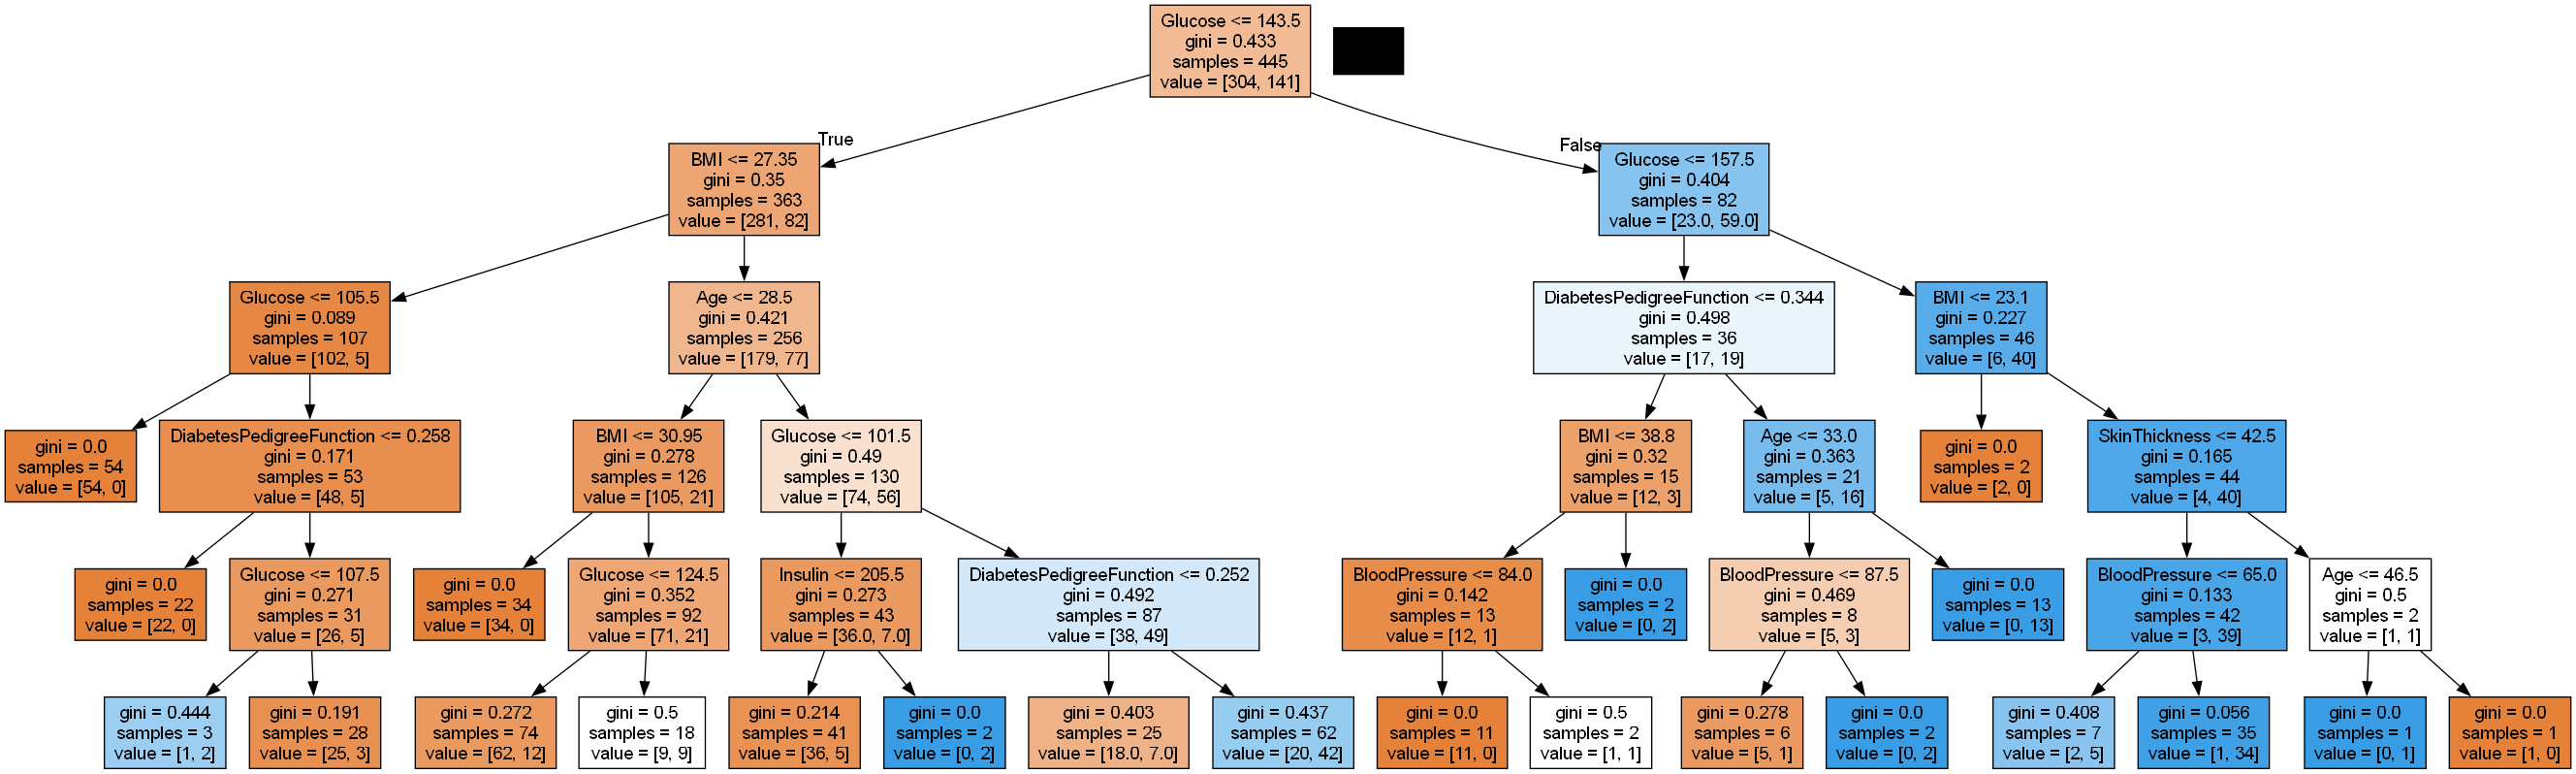

In [68]:
dot_data = StringIO()
export_graphviz(
    tree_grid.best_estimator_, feature_names=df.columns, out_file=dot_data, filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Стоит отметить, что при такой визуализации чем больше объектов одного класса, тем цвет вершины ближе к темно-оранжевому и, наоборот, чем больше объектов второго класса, тем ближе цвет к темно-синему.

`5.` Воспользуемся также и другими метриками:

In [69]:
from sklearn.metrics import precision_score

precision = precision_score(y_holdout, tree_grid.predict(X_holdout))
print(f'Дерево: {precision}')

precision = precision_score(y_holdout, knn_grid.predict(X_holdout))
print(f'kNN: {precision}')

Дерево: 0.6129032258064516
kNN: 0.6111111111111112


In [70]:
from sklearn.metrics import recall_score

recall = recall_score(y_holdout, tree_grid.predict(X_holdout))
print(f'Дерево: {recall}')

recall = recall_score(y_holdout, knn_grid.predict(X_holdout))
print(f'kNN: {recall}')

Дерево: 0.6785714285714286
kNN: 0.5892857142857143


In [71]:
from sklearn.metrics import f1_score

f_measure = f1_score(y_holdout, tree_grid.predict(X_holdout))
print(f'Дерево: {f_measure}')

f_measure = f1_score(y_holdout, knn_grid.predict(X_holdout))
print(f'kNN: {f_measure}')

Дерево: 0.6440677966101694
kNN: 0.6


In [72]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_holdout, tree_grid.predict(X_holdout))
print(f'Дерево: {roc}')

roc = recall_score(y_holdout, knn_grid.predict(X_holdout))
print(f'kNN: {roc}')

Дерево: 0.7503968253968254
kNN: 0.5892857142857143


`6.` Выводы:

- `Accuracy Score` - Хороший показатель, модель успешно предсказывает большинство тестовых данных. kNN сработало лучше дерева.
- `Presicion` - Значение среднее, нередки ложные срабатывания. kNN сработало лучше дерева.
- `Recall` - Показатель средний, модель неплохо справляется с нахождением всех положительных событий. Дерево отработало в этом случае лучше kNN.
- `F-measure` - Присутствует баланс между точностью и полнотой. Дерево также сработало лучше метода соседей.
- `ROC AUC` - Показатель указывает на неплохое деление. Дерево отработало лучше kNN.

Исходя из оценок, можем сделать вывод, что для работы с данным датасетом больше всего подходит алгоритм дерева решений. Модель (основываясь на важных признаках) достаточно хорошо может верно предсказать будет ли у пациентки диабет или нет, однако, повысить точность может добавление новых признаков в датасет (больше информации) и больше анализируемых данных (строк).